In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import tabula

In [5]:
tabula.convert_into(r"C:\Users\USER\Downloads\supply.pdf","demo.csv",pages = 'all',output_format = "csv")

In [6]:
supply = pd.read_csv("demo.csv")

In [7]:
tabula.convert_into(r"C:\Users\USER\Downloads\production.pdf","demo2.csv",pages = 'all',output_format = "csv")

In [8]:
production = pd.read_csv("demo2.csv")

In [9]:
pdf = production.copy()

In [10]:
sdf = supply.copy()

In [11]:
p_q1 = production['Value'].quantile(0.25)

In [12]:
p_q3 = production['Value'].quantile(0.75)

In [13]:
p_iqr = p_q3 - p_q1

In [14]:
P_upperbound = p_q3 + 1.5*p_iqr

In [15]:
P_lowerbound = p_q1 - 1.5*p_iqr

In [16]:
s_q1 = supply['Value'].quantile(0.25)
s_q3 = supply['Value'].quantile(0.75)
s_iqr = s_q3 - s_q1
s_upperbound = s_q3 + 1.5*s_iqr
s_lowerbound = s_q3 - 1.5*s_iqr

In [18]:
pdf["Value"].mean()

327.7852012115967

In [19]:
pdf["Value"].median()

18.0

In [93]:
p_q1 

3.0

In [94]:
p_q3

108.0

In [96]:
p_iqr #IQR of production(Value) data

105.0

In [98]:
P_lowerbound

-154.5

In [99]:
P_upperbound

265.5

In [100]:
s_q1

2177.0

In [101]:
s_q3

2682.0

In [102]:
s_iqr #IQR of supply value

505.0

In [103]:
s_upperbound

3439.5

In [105]:
s_lowerbound

1924.5

In [26]:
p_plot = pdf.groupby("Country").sum()

In [28]:
p_plot = p_plot.reset_index()

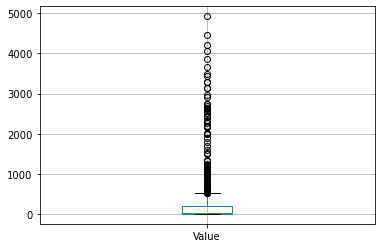

In [35]:
production_boxplot = pdf[pdf["Country"]=="Algeria"].boxplot()

<AxesSubplot:>

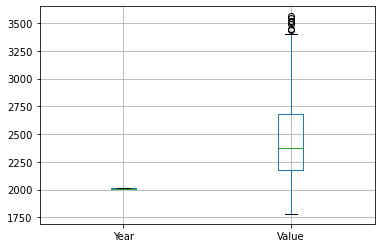

In [33]:
sdf.boxplot()

<AxesSubplot:>

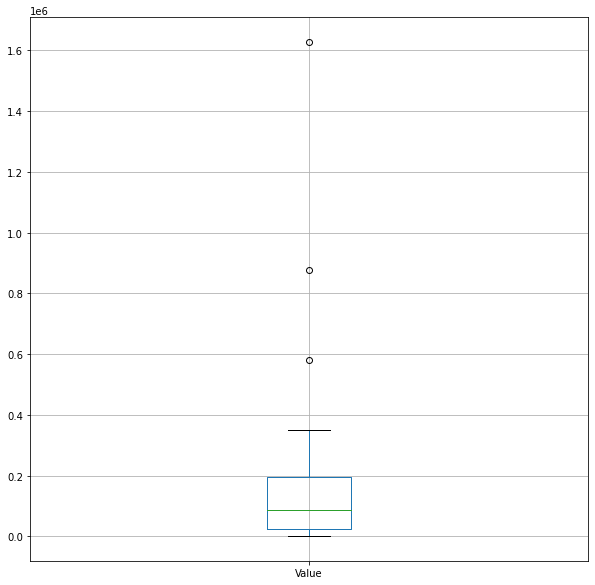

In [36]:
p_plot.boxplot(figsize = (10,10))

In [47]:
s_plot = sdf[["Country","Value"]].groupby("Country").sum() 

In [50]:
s_plot = s_plot.reset_index()

<AxesSubplot:xlabel='Country'>

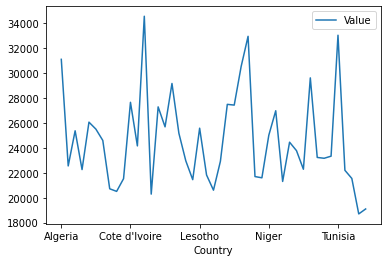

In [54]:
s_plot.plot.line(x = 'Country',y = 'Value')

<AxesSubplot:xlabel='Country'>

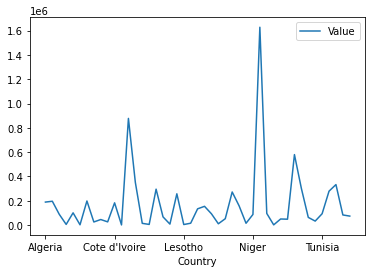

In [56]:
p_plot.plot.line(x = 'Country',y = 'Value')

In [71]:
pdf["Year"] = pdf["Year"].replace([")2004",")2005",")2006",")2007",")2008",")2009",")2010",")2011",")2012",")2013"],["2004","2005","2006","2007","2008","2009","2010","2011","2012","2013"])

In [72]:
s_plot2 = sdf.groupby("Year").sum()
p_plot2 = pdf.groupby("Year").sum() 

In [73]:
s_plot2

,Value
Year,
2004,107740
2005,108418
2006,109386
2007,110149
2008,110734
2009,111700
2010,112383
2011,113194
2012,113744


In [74]:
p_plot2

,Value
Year,
2004,663006
2005,691257
2006,718602
2007,705659
2008,736804
2009,746870
2010,786466
2011,812214
2012,846272


In [75]:
s_plot2 = s_plot2.reset_index()

In [76]:
p_plot2 = p_plot2.reset_index()

<AxesSubplot:xlabel='Year'>

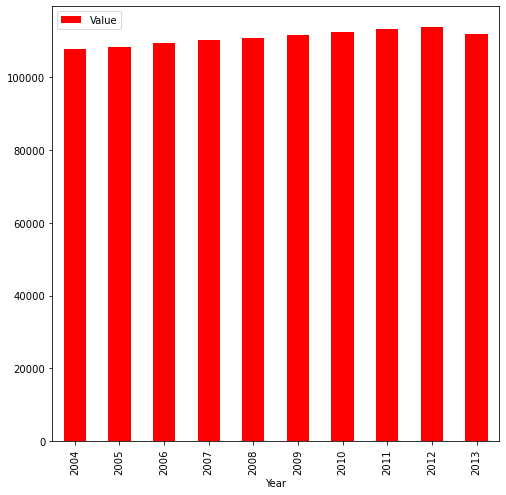

In [80]:
s_plot2.plot(kind = 'bar',x = 'Year',y = 'Value',figsize = (8,8),color = 'r')

<AxesSubplot:xlabel='Year'>

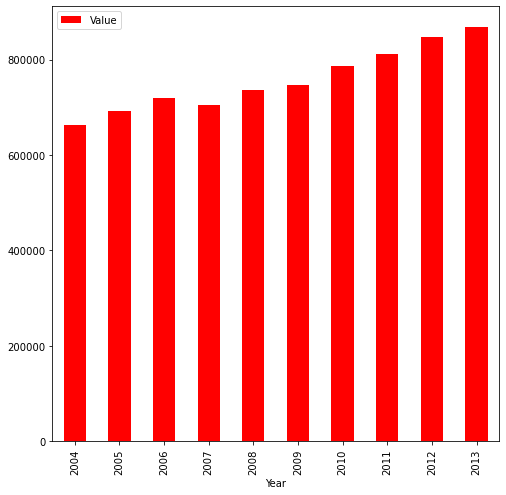

In [82]:
p_plot2.plot(kind = 'bar',x = 'Year',y = 'Value',figsize = (8,8),color = 'r')

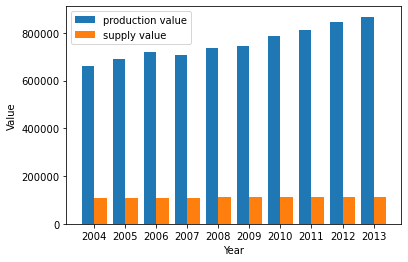

In [92]:
x_axis = np.arange(len(p_plot2))
plt.bar(x_axis - 0.2,p_plot2["Value"],0.4,label = "production value")
plt.bar(x_axis + 0.2,s_plot2["Value"],0.4,label = "supply value")
plt.xticks(x_axis,p_plot2["Year"])
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()